In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Legenda

def mySIR(x,t,param):
    
    dxdt1 = param[0]*x[0] +param[9]*x[0]*x[2] + param[9]*x[2]*x[3] - param[1]*x[0] -(param[2]*x[0]*x[1]) - x[0]*x[2]*(1-param[3]-param[4]) - param[3]*x[0]*x[2]
    dxdt2 = param[2]*x[0]*x[1] + x[0]*x[2]*(1-param[3]-param[4]) - (param[6] + param[1] + param[7] + param[8])*x[1]
    dxdt3 = x[1]*param[8] - param[4]*x[0]*x[2] - param[5]*x[3]*x[2]-param[9]*x[0]*x[2] - param[9]*x[2]*x[3]
    dxdt4 = x[1]*param[6] - param[1]*x[3] - param[3]*x[3]*x[2]
    
    return np.asarray([dxdt1,dxdt2,dxdt3,dxdt4])

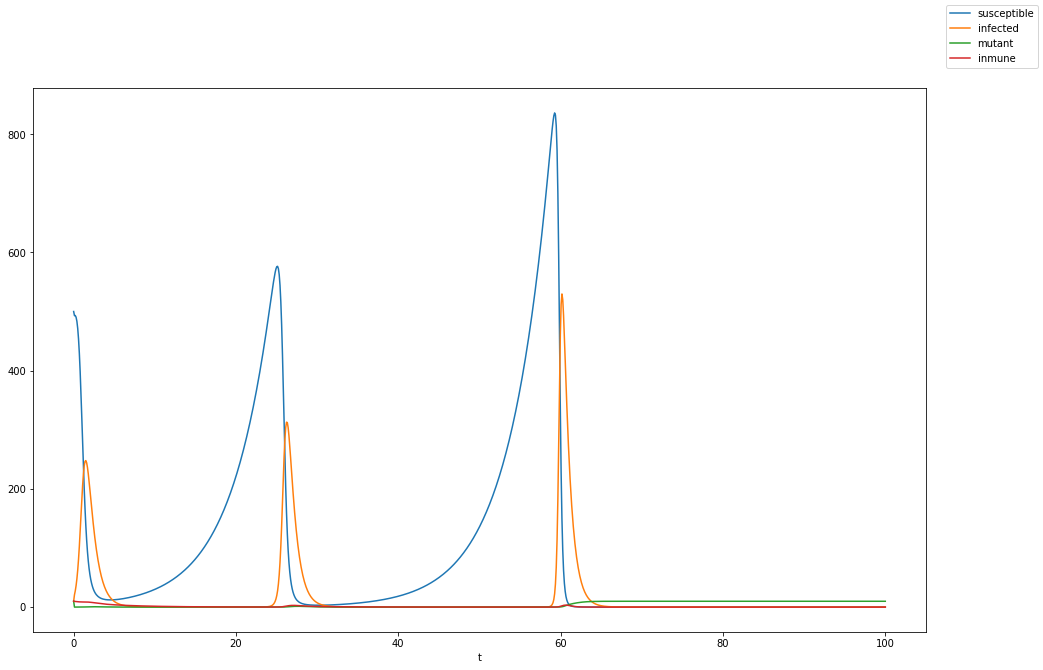

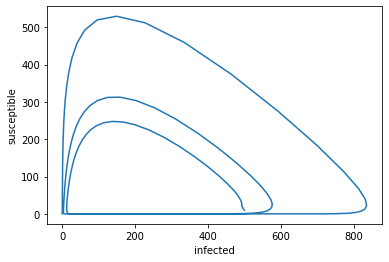

In [ ]:
y0 = np.asarray([500,10,10,10])  	# Starting composition
param = np.asarray([0.4,0.2,0.008,0.4,0.3,0.6,0.01,0.9,0.09,0.2])  	# Vector with the parameters of LV
tspan = np.asarray([0,100])	# Start and end times
Dt = 0.1			# Time interval to record results. Note that this is NOT the integration time step (which is automatically determined bu odeint).

# Prepare accessory variables
nsteps = int((tspan[1]-tspan[0])/Dt)
t2 = np.linspace(tspan[0],tspan[1],nsteps)

# Run odeint
y2 = odeint(mySIR, y0, t2, args=(param,))

# Plot results vs time
fig = plt.figure(figsize=(16,10))
l2 = plt.plot(t2, y2)
fig.legend(l2, ('susceptible', 'infected', 'mutant', 'inmune'))
#plt.axhline(y=20, xmin=0, xmax=360, color='r', linestyle='-.', linewidth=1)
#plt.axvline(x = 14, ymin=0, ymax=500, color='r', linestyle='--', linewidth=1)
plt.xlabel('t')
plt.show()

# Plot trajectories on the phase space
fig = plt.figure()
l2 = plt.plot(y2[:,0], y2[:,1])
plt.ylabel('susceptible')
plt.xlabel('infected')
#plt.xlabel('')
plt.show()